# KNN (K-nearest Neighbour Algorithm)


```python

1) Simplest Machine learning Algorithm you will find in Machine Learning
2) Brute Force Approach is used in it. (Hence Act as a ^Baseline^ , if u use any other algo then that algo must have accuracy better than KNN)
3) ^ Complexity O( M*N + (M + klogM) + k ) per Query ^ => if dataset is Large , this is gonna take much time to execute
where M is number of samples
and N is number of features in each sample.
```


The k-nearest neighbors algorithm (k-NN) is a `non-parametric method` or `lazy learners` used for both `classification and regression.` In both cases, the input consists of the k closest training examples in the feature space.
The output depends on whether k-NN is used for classification or regression:

`In k-NN classification, the output is a class membership.`
An object is classified by a vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). 

If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

`In k-NN regression, the output is the property value for the object.`
This value is the average of the values of its k nearest neighbors.



# ALGO

```python
1) Find distance of query point from all other point in dataset and store in as a list of tuple (distance,valueORlabel)
2) Sort the list based on distance
3) Take first k-smallest or nearest elements from the sorted list
4 a) if problem is classification
     - take the majority Vote Label and assigned to our Query Point
4 b) if problem is Regression
     - take the mean of values and assigned to our Query Point 
```

# Implementation `Training Time O(1)`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# K-NN on Classification Dataset

In [2]:
# No need of Preprocessing already values are normalized
X = np.loadtxt('Datasets/KNNDataset_X.csv', delimiter=',')[:,1:]
Y = np.loadtxt('Datasets/KNNDataset_Y.csv', delimiter=',')[:,1:].flatten()

In [3]:
X.shape

(400, 2)

In [4]:
Y.shape

(400,)

In [5]:
plt.style.use('seaborn')

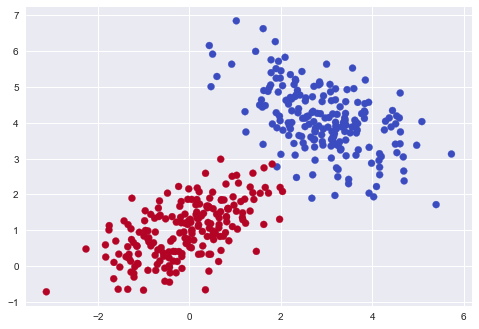

In [6]:
plt.scatter(X[:,0], X[:,1], c = Y,cmap='coolwarm')

In [7]:
def distance(x1,x2):
    squared_sum = np.sum((x1-x2)**2) # using Euclidean Distance
    return np.sqrt(squared_sum)

In [8]:
def KNN(X,Y,queryPoint,k=5):
    
    distance_li = []
    
    # --------------------------------
    # O(M*N) below 
    # -----------------------------
    for i in range(X.shape[0]): # O(M)
        d = distance(X[i],queryPoint) # O(N)
        distance_li.append((d,Y[i]))
        
    
    # --------------------------------
    # O(MlogM) below (can use heap hence M time to build heap and klogm for k-minimum elements)-> O(M + klogM)= O(M)
    # -----------------------------
    sorted_li = sorted(distance_li)     # Nearest K-points 
    sorted_li = np.array(sorted_li[:k]) # getting k-nearest points label
    labels = sorted_li[:, 1]
    
    # --------------------------------
    # O(K) below ( returning max-voted Candidate/Label/Class)
    # -----------------------------
    
    values, count = np.unique(labels, return_counts=True) # returns array of values with its count.
#     print('Unique Values : ' , values)
#     print('Respective Counts  : ' , count)

    max_index = np.argmax(count)
    return int(values[max_index])
    

# Query 

In [9]:
queryPoint1 = np.array([-2,2])
queryPoint2 = np.array([1,1])
queryPoint3 = np.array([2,3])
queryPoint4 = np.array([4,4])
queryPoint5 = np.array([6,6])

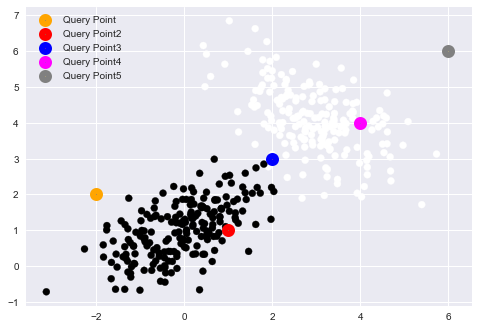

In [10]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.scatter(queryPoint1[0],queryPoint1[1], marker = 'o',edgecolors='orange',linewidths=6,label = 'Query Point')
plt.scatter(queryPoint2[0],queryPoint2[1], marker = 'o',edgecolors='red',linewidths=6,label = 'Query Point2')
plt.scatter(queryPoint3[0],queryPoint3[1], marker = 'o',edgecolors='blue',linewidths=6,label = 'Query Point3')
plt.scatter(queryPoint4[0],queryPoint4[1], marker = 'o',edgecolors='magenta',linewidths=6,label = 'Query Point4')
plt.scatter(queryPoint5[0],queryPoint5[1], marker = 'o',edgecolors='gray',linewidths=6,label = 'Query Point5')

plt.legend(loc=0)

In [11]:
print('Class for querypoint: [{x},{y}] is {z}'.format(x=queryPoint1[0] , y = queryPoint1[1] , z =KNN(X,Y,queryPoint1)))
print('Class for querypoint: [{x},{y}] is {z}'.format(x=queryPoint2[0] , y = queryPoint2[1] , z =KNN(X,Y,queryPoint2)))
print('Class for querypoint: [{x},{y}] is {z}'.format(x=queryPoint3[0] , y = queryPoint3[1] , z =KNN(X,Y,queryPoint3)))
print('Class for querypoint: [{x},{y}] is {z}'.format(x=queryPoint4[0] , y = queryPoint4[1] , z =KNN(X,Y,queryPoint4)))
print('Class for querypoint: [{x},{y}] is {z}'.format(x=queryPoint5[0] , y = queryPoint5[1] , z =KNN(X,Y,queryPoint5)))


Class for querypoint: [-2,2] is 1
Class for querypoint: [1,1] is 1
Class for querypoint: [2,3] is 0
Class for querypoint: [4,4] is 0
Class for querypoint: [6,6] is 0


# Using KNN on MNIST Dataset(Multiclass Classification Dataset)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [14]:
digits = load_digits()

In [15]:
X = digits.data
Y = digits.target

In [16]:
X.shape # have 1797 sample points- examples

(1797, 64)

In [17]:
Y

array([0, 1, 2, ..., 8, 9, 8])

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
def distance(x1,x2):
    squared_sum = np.sum((x1-x2)**2) # using Euclidean Distance
    return np.sqrt(squared_sum)

In [20]:
def KNN(X,Y,queryPoint,k=5):
    
    distance_li = []
    
    # --------------------------------
    # O(M*N) below 
    # -----------------------------
    for i in range(X.shape[0]): # O(M)
        d = distance(X[i],queryPoint) # O(N)
        distance_li.append((d,Y[i]))
        
    
    # --------------------------------
    # O(MlogM) below 
    # -----------------------------
    sorted_li = sorted(distance_li)     # Nearest K-points 
    sorted_li = np.array(sorted_li[:k]) # getting k-nearest points label
    labels = sorted_li[:, 1]
    
    # --------------------------------
    # O(K) below ( returning max-voted Candidate/Label/Class)
    # -----------------------------
    
    values, count = np.unique(labels, return_counts=True) # returns array of values with its count.
#     print('Unique Values : ' , values)
#     print('Respective Counts  : ' , count)

    max_index = np.argmax(count)
    return int(values[max_index])
    

# Query 

In [21]:
queryPoint = X_test[4]
expected_output = Y_test[4]

In [22]:
our_ouput = KNN(X_train,Y_train,queryPoint)

In [23]:
our_ouput, expected_output

(2, 2)

In [24]:
def getaccuracy(X,Y,queryPoints,queryPoints_ans):
    output = []
    
    for query in queryPoints:
        output.append(KNN(X,Y,query))
    output = np.array(output)
    
    acc = (output == queryPoints_ans).sum() 
    return acc / queryPoints.shape[0]

In [25]:
getaccuracy(X_train,Y_train, X_test, Y_test)

0.9861111111111112